# Import libraries and load data 

In [125]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

#SK Learn 
#You'll notice that some of the modules have from sklearn in portions of the import statements. 
#This is because we need to specify where the needed function "lives" before importing it.
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier ,export_graphviz
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.datasets import load_digits
from sklearn.tree import plot_tree
from sklearn import svm
from sklearn.tree import export_text
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree


import pydotplus
import pydot
from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')  

%matplotlib inline
#give full path of where your data file 
data = pd.read_csv('Demographic_Data (1).csv')
data.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


# Data Analysis 

In [2]:
#useful code for overview of your data 
data.describe()

,in-store,age,items,amount,region
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,0.500000,45.757925,4.504975,835.919670,2.675000
std,0.500003,15.715679,2.061238,721.273736,1.126672
min,0.000000,18.000000,1.000000,5.004700,1.000000
25%,0.000000,33.000000,3.000000,285.140000,2.000000
50%,0.500000,45.000000,4.000000,582.315000,3.000000
75%,1.000000,56.000000,6.000000,1233.700000,4.000000
max,1.000000,85.000000,8.000000,3000.000000,4.000000


In [3]:
#helps get data type of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  80000 non-null  int64  
 1   age       80000 non-null  int64  
 2   items     80000 non-null  int64  
 3   amount    80000 non-null  float64
 4   region    80000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.1 MB


In [4]:
#to find if your data set has null 
print(data.isnull().sum())

in-store    0
age         0
items       0
amount      0
region      0
dtype: int64


In [5]:
#removes any NA
data.dropna()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1
...,...,...,...,...,...
79995,1,71,3,558.82,1
79996,0,59,7,1932.00,3
79997,0,54,1,414.16,2
79998,1,49,4,335.32,1


In [6]:
#drops all duplicates - looks like this data set has 21 duplicate rows 
data.drop_duplicates()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1
...,...,...,...,...,...
79995,1,71,3,558.82,1
79996,0,59,7,1932.00,3
79997,0,54,1,414.16,2
79998,1,49,4,335.32,1


In [7]:
#columns in your data set 
data.columns

Index(['in-store', 'age', 'items', 'amount', 'region'], dtype='object')

In [8]:
data['age'].unique()

array([37, 35, 45, 46, 33, 24, 43, 66, 51, 47, 44, 32, 48, 34, 20, 58, 49,
       55, 31, 53, 21, 42, 40, 28, 59, 41, 74, 19, 54, 57, 30, 27, 38, 26,
       36, 22, 39, 69, 81, 65, 61, 62, 78, 29, 67, 80, 73, 25, 52, 50, 70,
       56, 60, 64, 71, 63, 84, 72, 83, 79, 18, 23, 68, 75, 85, 76, 77, 82])

# Visualization

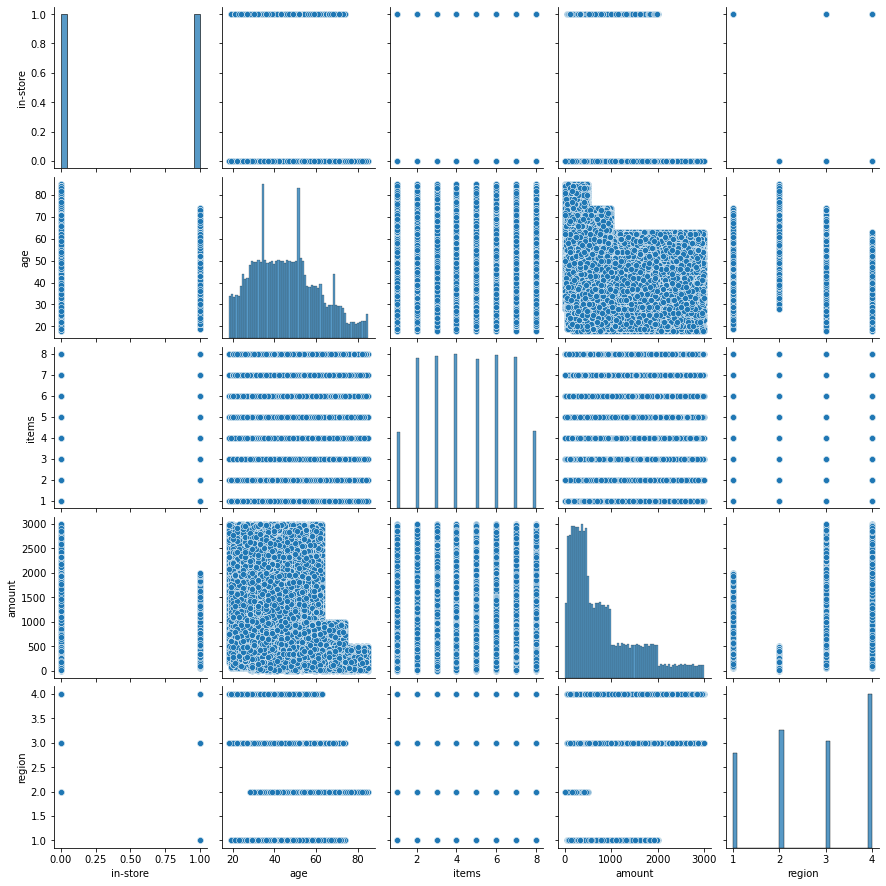

In [9]:
#Pair plot using Seaborn - very useful visualization 
sns.pairplot(data)

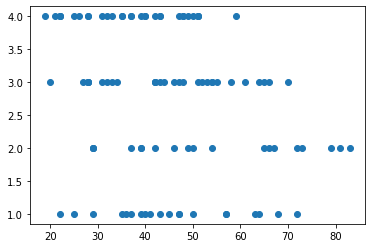

In [10]:
#Scatter plot b/w age and region 
data_sample = data.sample(100)
x = data_sample['age']
y = data_sample['region']
plt.scatter(x,y, marker='o')
plt.show()

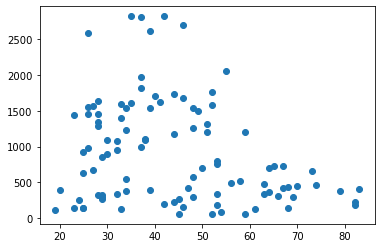

In [11]:
#Scatter plot b/w age and region 
data_sample = data.sample(100)
x = data_sample['age']
y = data_sample['amount']
plt.scatter(x,y, marker='o')
plt.show()

# Correlation

In [12]:
#Correlation 
def correlation_heatmap(data):
    correlations = data.corr()
    print(correlations)
corr_mat = data.corr()
print(corr_mat)   

          in-store       age     items    amount    region
in-store  1.000000 -0.178256 -0.003954 -0.085474 -0.133114
age      -0.178256  1.000000  0.000679 -0.282089 -0.235446
items    -0.003954  0.000679  1.000000  0.000367 -0.001925
amount   -0.085474 -0.282089  0.000367  1.000000  0.403504
region   -0.133114 -0.235446 -0.001925  0.403504  1.000000


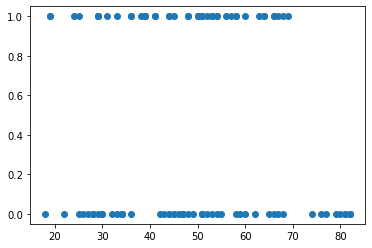

In [13]:
#Scatter plot b/w age and region 
data_sample = data.sample(100)
x = data_sample['age']
y = data_sample['in-store']
plt.scatter(x,y, marker='o')
plt.show()

# Splitting your data to fit any machine learning model

### Preparing the data
### You will learn how to separate your data set into features and target variable, and then further split it into test and train parts. And all of this just with few lines of code, elegant and simple.¶

In [14]:
A = data[['age','amount','in-store']]
B = data['region']

In [15]:
A

,age,amount,in-store
0,37,281.03,0
1,35,219.51,0
2,45,1525.70,1
3,46,715.25,1
4,33,1937.50,1
...,...,...,...
79995,71,558.82,1
79996,59,1932.00,0
79997,54,414.16,0
79998,49,335.32,1


In [16]:
B

0        2
1        2
2        4
3        3
4        1
        ..
79995    1
79996    3
79997    2
79998    1
79999    3
Name: region, Length: 80000, dtype: int64

In [17]:
A_train, A_test, b_train, b_test = train_test_split(A, B ,test_size = 0.3, shuffle=False)
print(A_train.shape,A_test.shape,b_train.shape,b_test.shape)

(56000, 3) (24000, 3) (56000,) (24000,)


In [18]:
#Using Support Vector Classifier
clf = svm.SVC()
clf.fit(A_train,b_train)

SVC()

In [19]:
clf.score(A_test, b_test)

0.53625

In [20]:
b_test[10:15]

56010    3
56011    2
56012    3
56013    2
56014    1
Name: region, dtype: int64

In [21]:
#Using linear regression model
linear_regression_model = linear_model.LinearRegression()
model1= linear_regression_model.fit(A_train,b_train)

In [22]:
b_pred = model1.predict(A_test)

In [23]:
print(b_pred)

[2.38357499 2.47528117 2.46003317 ... 2.50053417 2.22505761 2.54767011]


In [24]:
model1.score(A_train,b_train)

0.19541453243355156

In [25]:
model1.coef_

array([-0.01153049,  0.0005398 , -0.29057138])

# Intro to Sci-kit learn
## Data Structure

In [26]:
#sklearn.datasets.load_digits(*, n_class=10, return_X_y=False, as_frame=False)[source]¶ 
#Load and return the digits dataset (classification).
#Each datapoint is a 8x8 image of a digit.

digits = load_digits()
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [27]:
print(digits.data.shape)

(1797, 64)


In [28]:
plt.gray() 

<Figure size 432x288 with 0 Axes>

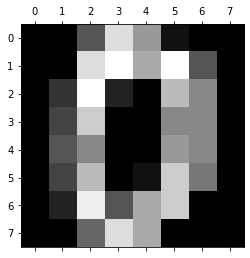

In [29]:
plt.matshow(digits.images[0]) 

In [30]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

## Selecting Data 

In [31]:
# select first 3 rows 
#Slicing using the [ ] operator selects a set of rows and/or columns from a Data
data[0:3]

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4


In [32]:
# selecting columns using Pandas
#Why do you think 5 columns were selected instead of just 4 as indicated? 
# Its printing the index also. right? 
I = data.iloc[:,0:4]
print(I)

       in-store  age  items   amount
0             0   37      4   281.03
1             0   35      2   219.51
2             1   45      3  1525.70
3             1   46      3   715.25
4             1   33      4  1937.50
...         ...  ...    ...      ...
79995         1   71      3   558.82
79996         0   59      7  1932.00
79997         0   54      1   414.16
79998         1   49      4   335.32
79999         1   30      1   527.12

[80000 rows x 4 columns]


In [33]:
#features
M = data.iloc[:,0:4]
print('Summary of feature sample')
M.head()

Summary of feature sample


,in-store,age,items,amount
0,0,37,4,281.03
1,0,35,2,219.51
2,1,45,3,1525.70
3,1,46,3,715.25
4,1,33,4,1937.50


In [34]:
#dependent variable
n = data['region']

## Train test Split/ Model / Predict  - Decision Tree Classifier

In [35]:
M_train, M_test, n_train, n_test = train_test_split(M, n, test_size = .30, random_state = 123)
print(M_train.shape,M_test.shape,n_train.shape,n_test.shape)

(56000, 4) (24000, 4) (56000,) (24000,)


In [36]:
#Modeling (Classification)
algo = DecisionTreeClassifier(max_depth=4)
dtcmodel = algo.fit(M_train,n_train)

In [37]:
#Predictions
preds = dtcmodel.predict(M_test)

In [38]:
print(classification_report(n_test, preds))

              precision    recall  f1-score   support

           1       0.41      0.55      0.47      4857
           2       0.90      1.00      0.95      5945
           3       0.55      0.24      0.34      5389
           4       0.65      0.71      0.68      7809

    accuracy                           0.64     24000
   macro avg       0.63      0.63      0.61     24000
weighted avg       0.64      0.64      0.63     24000



# Cross Validation

In [39]:
print(cross_val_score(algo, M, n, cv=3)) # cv = number of folds being held out

[0.64187948 0.64206697 0.64269107]


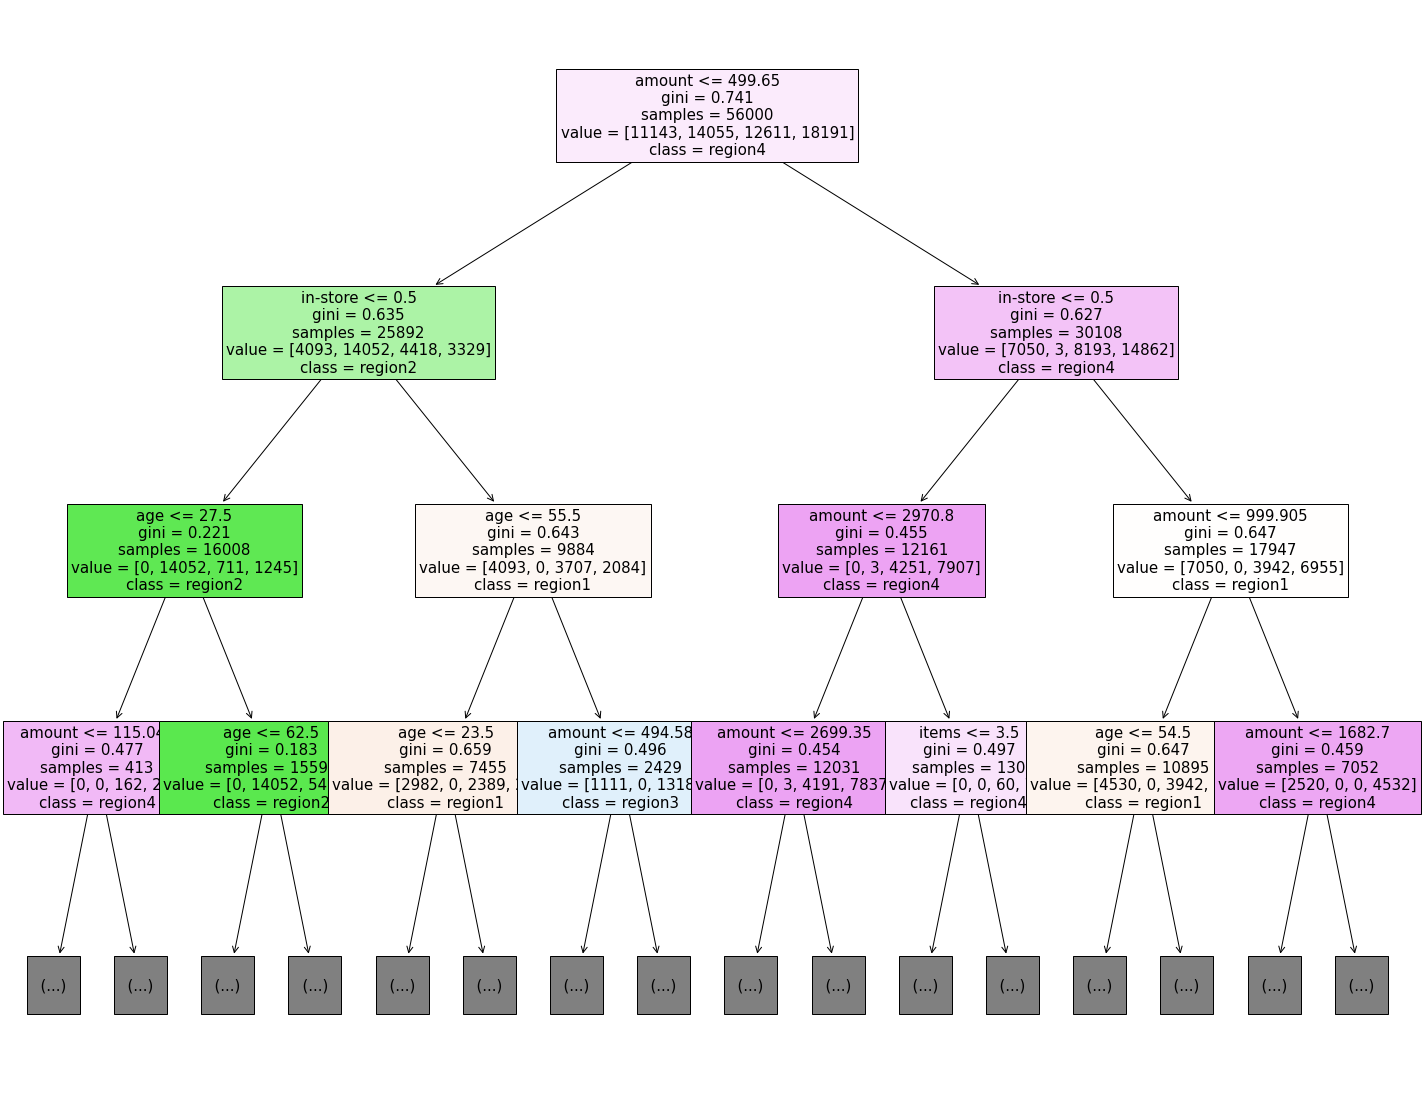

In [40]:
#decision tree for region(dependent variable)
#inference between root node and leaf nodes
#Less than $500 spend comes from in-store from Region2 
#Region 4 will do mostly online shopping
#Region 2 will be online less than 27 age 
#age 54 or less spend more than 1000 in in-store from region 1
#age between 27-62 from region 2 and will shop online 
#Age 23- 55 from region 1 will shop in-store 


fig1 = plt.figure(figsize=(25,20))
tree1 = plot_tree(dtcmodel,max_depth=3, feature_names=M.columns,class_names=['region1', 'region2', 'region3', 'region4'], filled=True,fontsize=15)

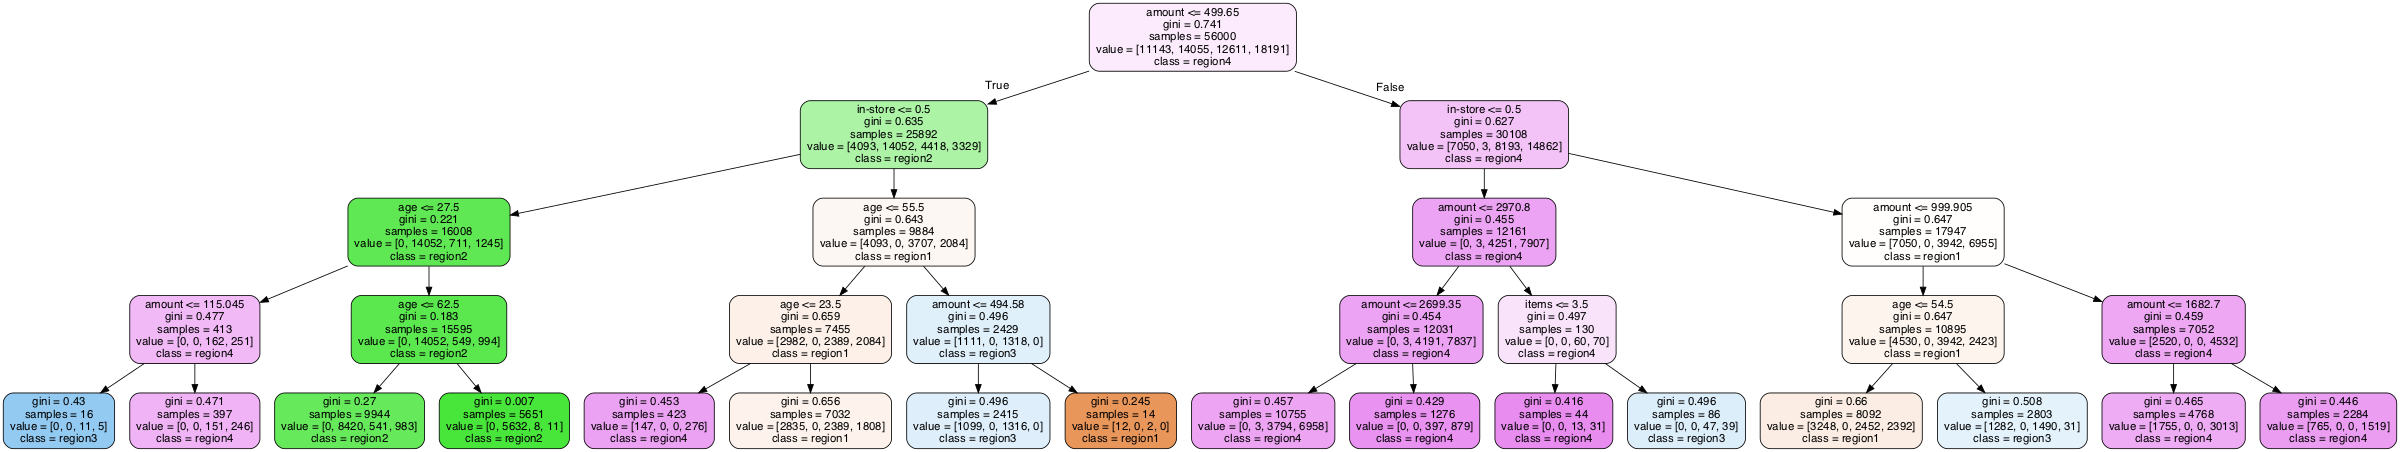

In [110]:
out_file1 = tree.export_graphviz(
    dtcmodel,
    feature_names   = M.columns,
    class_names     = ['region1', 'region2','region3','region4'],# Ascending numerical order
    filled          = True,
    rounded         = True
)
graph1 = pydotplus.graph_from_dot_data(out_file1)
graph1.set_size('"25,25!"')
Image(graph1.create_png())

In [41]:
r = export_text(algo)
print(r)

|--- feature_3 <= 499.65
|   |--- feature_0 <= 0.50
|   |   |--- feature_1 <= 27.50
|   |   |   |--- feature_3 <= 115.04
|   |   |   |   |--- class: 3
|   |   |   |--- feature_3 >  115.04
|   |   |   |   |--- class: 4
|   |   |--- feature_1 >  27.50
|   |   |   |--- feature_1 <= 62.50
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  62.50
|   |   |   |   |--- class: 2
|   |--- feature_0 >  0.50
|   |   |--- feature_1 <= 55.50
|   |   |   |--- feature_1 <= 23.50
|   |   |   |   |--- class: 4
|   |   |   |--- feature_1 >  23.50
|   |   |   |   |--- class: 1
|   |   |--- feature_1 >  55.50
|   |   |   |--- feature_3 <= 494.58
|   |   |   |   |--- class: 3
|   |   |   |--- feature_3 >  494.58
|   |   |   |   |--- class: 1
|--- feature_3 >  499.65
|   |--- feature_0 <= 0.50
|   |   |--- feature_3 <= 2970.80
|   |   |   |--- feature_3 <= 2699.35
|   |   |   |   |--- class: 4
|   |   |   |--- feature_3 >  2699.35
|   |   |   |   |--- class: 4
|   |   |--- feature_3 >  2970.80
|   |

## RandomForestClassifier

In [42]:
clf1=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets
clf1.fit(M_train,n_train)

h_pred=clf1.predict(M_test)

print("Accuracy:",metrics.accuracy_score(n_test, h_pred)) 

Accuracy: 0.57925


## Decision tree Classifier 

In [43]:
accuracy_score(n_test,preds)

0.6445833333333333

# Discretize Age and predicting against region feature 

In [44]:
# Discretize Age
# lesson learnt - do not drop anything :/
# 4 bins
data['Age_grp']= pd.cut(data.age,bins=[18,24,44,64,85],include_lowest=True,labels=['18-24','24-44','44-64','64-85'])
#data['Age_grp']=  pd.cut(data.age, bins=2, labels=False)

data   

,in-store,age,items,amount,region,Age_grp
0,0,37,4,281.03,2,24-44
1,0,35,2,219.51,2,24-44
2,1,45,3,1525.70,4,44-64
3,1,46,3,715.25,3,44-64
4,1,33,4,1937.50,1,24-44
...,...,...,...,...,...,...
79995,1,71,3,558.82,1,64-85
79996,0,59,7,1932.00,3,44-64
79997,0,54,1,414.16,2,44-64
79998,1,49,4,335.32,1,44-64


 ## Are there differences in the age of customers between regions?

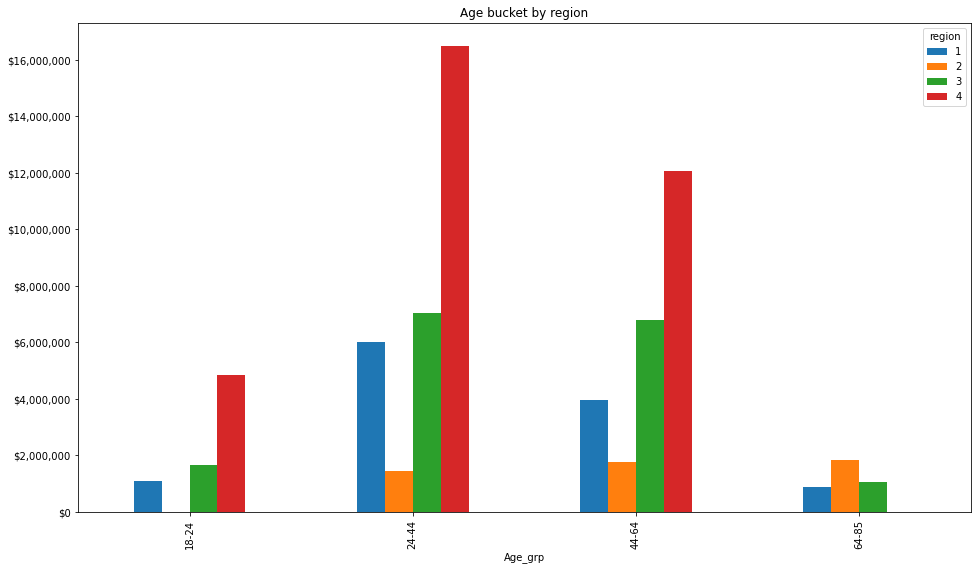

In [45]:
# Age cut by region - yes, 18-24 dont come from region 2 and 64 -85 dont shop in region 4
pivot1 = pd.pivot_table(data,index='Age_grp',columns='region',values='amount',aggfunc='sum',fill_value=0)
pivot1.plot.bar(figsize=(16, 9), title='Age bucket by region').yaxis.set_major_formatter('${x:,.0f}')

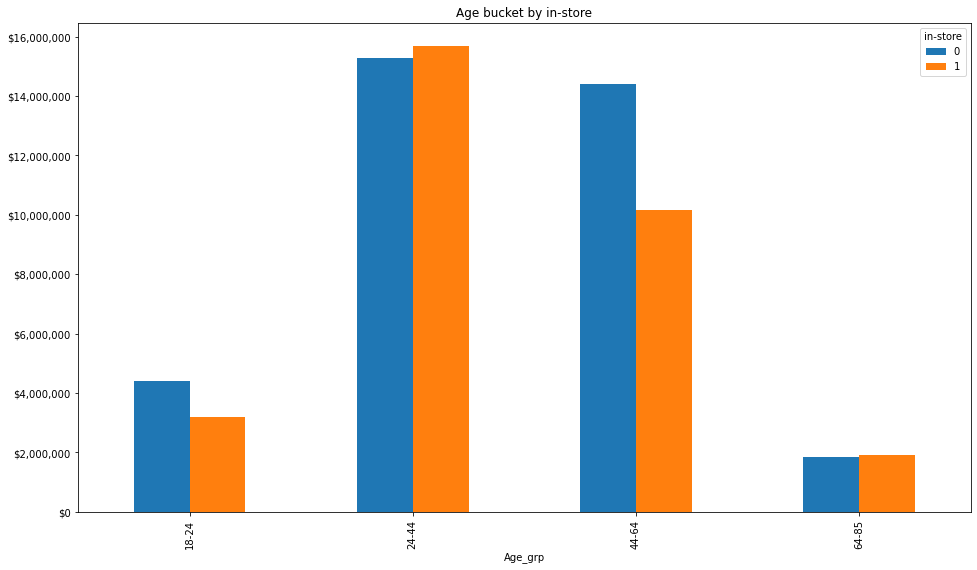

In [46]:
# Age cut by in-store 
pivot2 = pd.pivot_table(data,index='Age_grp',columns='in-store',values='amount',aggfunc='sum',fill_value=0)
pivot2.plot.bar(figsize=(16, 9), title='Age bucket by in-store').yaxis.set_major_formatter('${x:,.0f}')

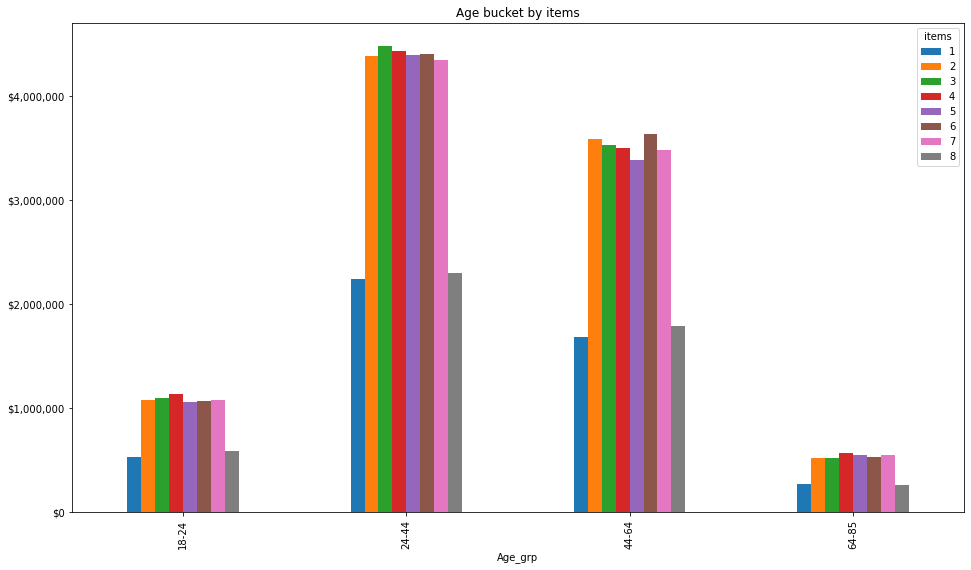

In [47]:
# Age cut by in-store 
pivot2 = pd.pivot_table(data,index='Age_grp',columns='items',values='amount',aggfunc='sum',fill_value=0)
pivot2.plot.bar(figsize=(16, 9), title='Age bucket by items').yaxis.set_major_formatter('${x:,.0f}')

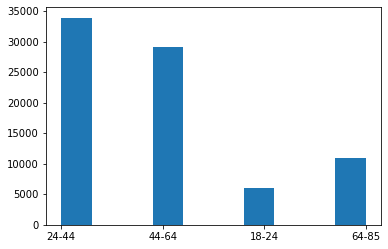

In [48]:
plt.hist(data['Age_grp'])
plt.show()

In [49]:
#features
J = data.iloc[:,[0,2,3,4]]
print('Summary of feature sample')
J.head()

Summary of feature sample


,in-store,items,amount,region
0,0,4,281.03,2
1,0,2,219.51,2
2,1,3,1525.70,4
3,1,3,715.25,3
4,1,4,1937.50,1


In [50]:
#dependent variable
k = data['Age_grp']

In [51]:
#Train/Test Split
J_train, J_test, k_train, k_test = train_test_split(J, k, test_size = .30, random_state = 123)
print(J_train.shape,J_test.shape,k_train.shape,k_test.shape)

(56000, 4) (24000, 4) (56000,) (24000,)


In [52]:
print(J_train,k_train)

       in-store  items    amount  region
25183         1      4   700.190       4
37715         1      3   825.290       4
38347         0      5   315.270       2
4589          1      4  1923.900       1
78269         0      3  2503.800       3
...         ...    ...       ...     ...
63206         0      6    25.055       2
61404         0      4   232.070       2
17730         1      2  1608.000       4
28030         0      3  2072.700       4
15725         0      4   833.700       4

[56000 rows x 4 columns] 25183    24-44
37715    24-44
38347    44-64
4589     18-24
78269    24-44
         ...  
63206    64-85
61404    24-44
17730    24-44
28030    18-24
15725    24-44
Name: Age_grp, Length: 56000, dtype: category
Categories (4, object): ['18-24' < '24-44' < '44-64' < '64-85']


In [53]:
print(J_train,k_train)

       in-store  items    amount  region
25183         1      4   700.190       4
37715         1      3   825.290       4
38347         0      5   315.270       2
4589          1      4  1923.900       1
78269         0      3  2503.800       3
...         ...    ...       ...     ...
63206         0      6    25.055       2
61404         0      4   232.070       2
17730         1      2  1608.000       4
28030         0      3  2072.700       4
15725         0      4   833.700       4

[56000 rows x 4 columns] 25183    24-44
37715    24-44
38347    44-64
4589     18-24
78269    24-44
         ...  
63206    64-85
61404    24-44
17730    24-44
28030    18-24
15725    24-44
Name: Age_grp, Length: 56000, dtype: category
Categories (4, object): ['18-24' < '24-44' < '44-64' < '64-85']


In [54]:
#finding NAN in my pd.cut 

is_NaN = data.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = data[row_has_NaN]
print(rows_with_NaN)

Empty DataFrame
Columns: [in-store, age, items, amount, region, Age_grp]
Index: []


In [55]:
#Modeling (Classification)
agebin = DecisionTreeClassifier(max_depth=3)

In [56]:
modelage = agebin.fit(J_train,k_train)

In [57]:
#Predictions
preds_age = modelage.predict(J_test)

In [58]:
#confusion matrix 
confusion_matrix(k_test,preds_age)

array([[   0, 1796,    0,    0],
       [   0, 8569,    0, 1739],
       [   0, 6551,    0, 2095],
       [   0, 1140,    0, 2110]])

In [59]:

print(classification_report(k_test, preds_age))

              precision    recall  f1-score   support

       18-24       0.00      0.00      0.00      1796
       24-44       0.47      0.83      0.60     10308
       44-64       0.00      0.00      0.00      8646
       64-85       0.35      0.65      0.46      3250

    accuracy                           0.44     24000
   macro avg       0.21      0.37      0.27     24000
weighted avg       0.25      0.44      0.32     24000



## cross validation

In [60]:
print(cross_val_score(agebin, J, k, cv=3)) # cv = number of folds being held out

[0.44174448 0.44459444 0.440186  ]


In [61]:
h = export_text(agebin)
print(h)

|--- feature_2 <= 499.89
|   |--- feature_3 <= 2.50
|   |   |--- feature_0 <= 0.50
|   |   |   |--- class: 64-85
|   |   |--- feature_0 >  0.50
|   |   |   |--- class: 24-44
|   |--- feature_3 >  2.50
|   |   |--- feature_3 <= 3.50
|   |   |   |--- class: 24-44
|   |   |--- feature_3 >  3.50
|   |   |   |--- class: 24-44
|--- feature_2 >  499.89
|   |--- feature_2 <= 1001.05
|   |   |--- feature_3 <= 3.50
|   |   |   |--- class: 24-44
|   |   |--- feature_3 >  3.50
|   |   |   |--- class: 24-44
|   |--- feature_2 >  1001.05
|   |   |--- feature_0 <= 0.50
|   |   |   |--- class: 24-44
|   |   |--- feature_0 >  0.50
|   |   |   |--- class: 24-44



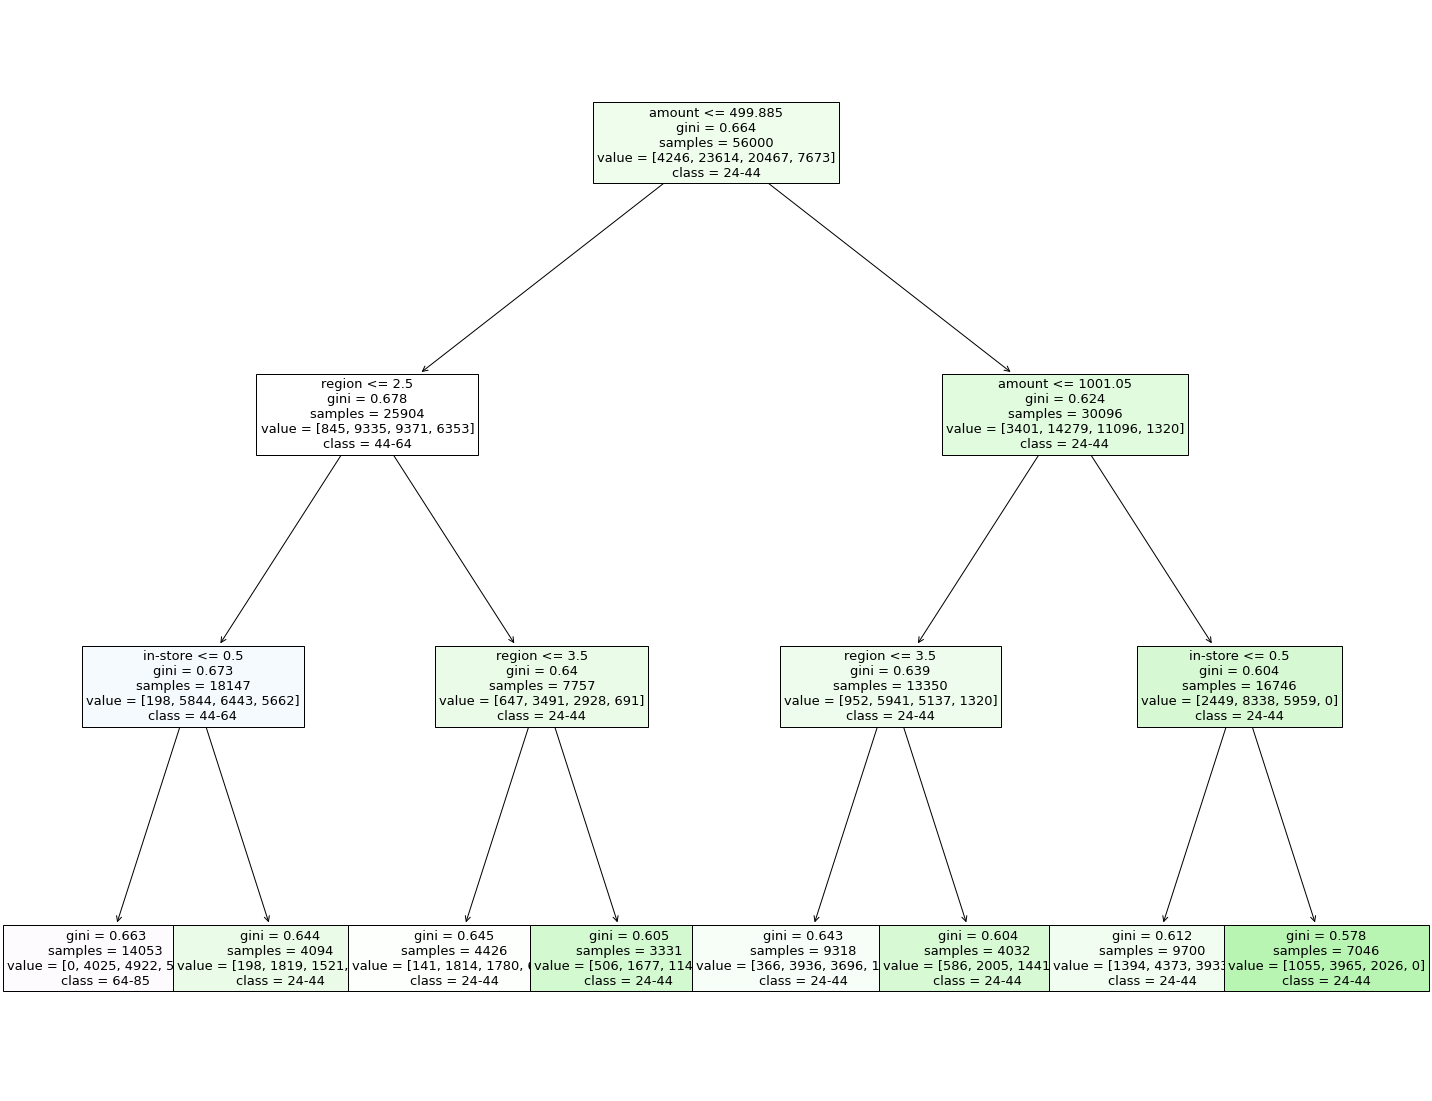

In [62]:
# Region 1 and 2 will be mostly between 44 - 64 
# cannot predict 18-24 
# Region  3 and 4 are mostly between 24-44 and can shop both online and instore
# 64-85 will be online shoppers

fig2 = plt.figure(figsize=(25,20))
tree2 = plot_tree(modelage,max_depth=3, feature_names=J.columns,
                 class_names=['18-24' ,'24-44','44-64','64-85'],filled=True,fontsize=13)



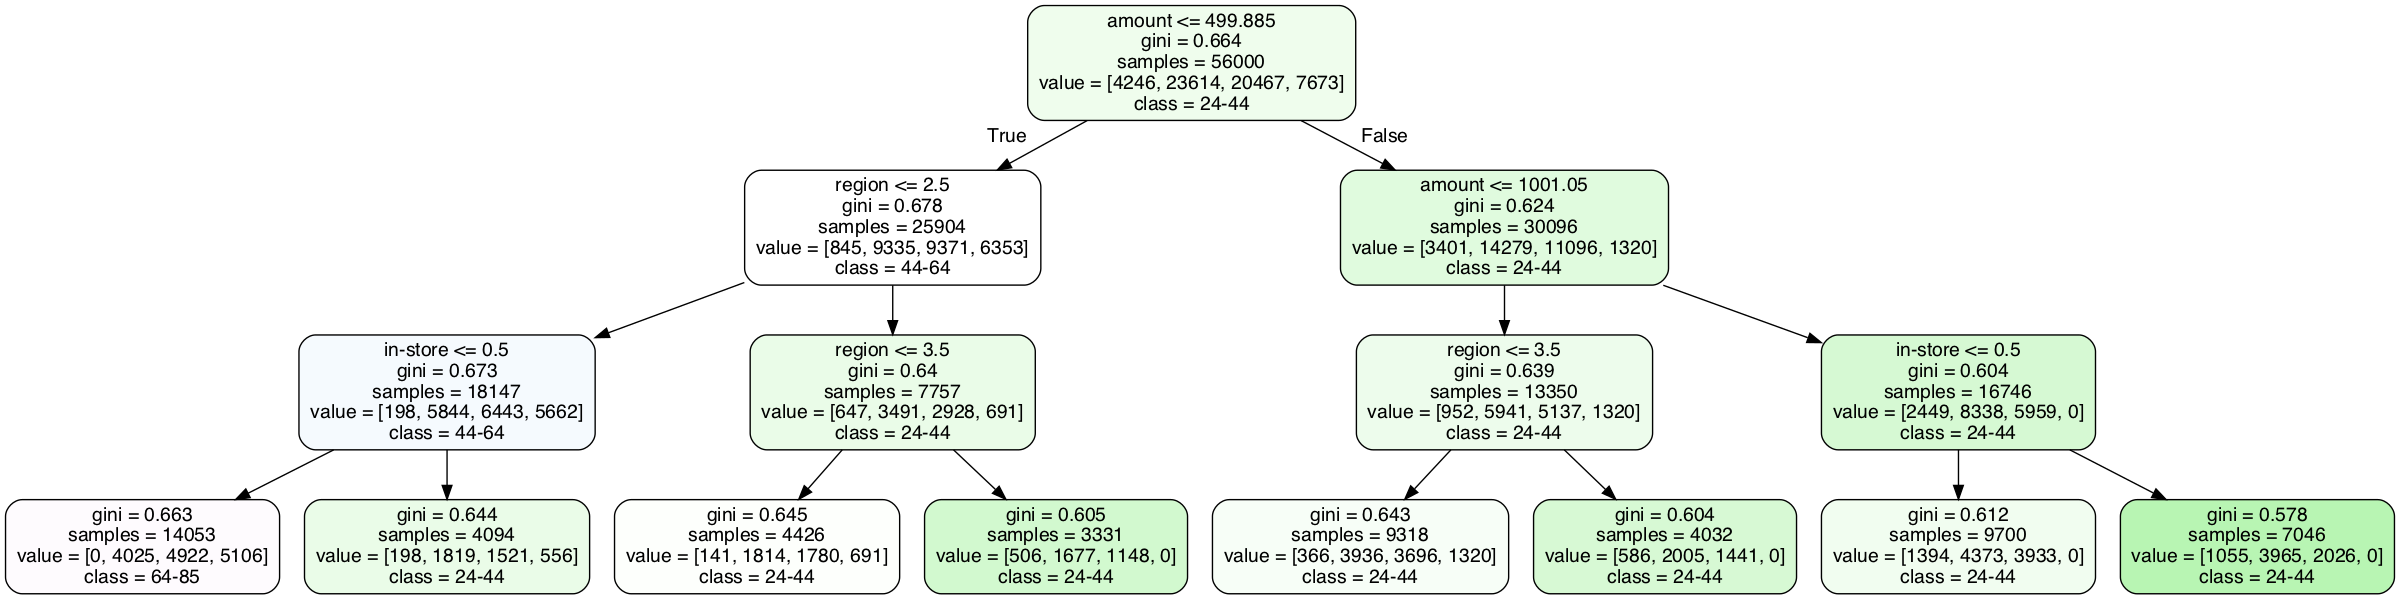

In [112]:
out_file2 = tree.export_graphviz(
    modelage,
    feature_names   = J.columns,
    class_names     = ['18-24' ,'24-44','44-64','64-85'],# Ascending numerical order
    filled          = True,
    rounded         = True
)
graph2 = pydotplus.graph_from_dot_data(out_file2)
graph2.set_size('"25,25!"')
Image(graph2.create_png())

In [63]:
accuracy_score(k_test,preds_age)

0.44495833333333334

In [64]:
score = agebin.score(J_test, k_test)
print(score)

0.44495833333333334


## Random Forest Classifer

In [65]:
clf2=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets
clf2.fit(J_train,k_train)
y_pred=clf2.predict(J_test)
print("Accuracy:",metrics.accuracy_score(k_test, y_pred)) 

Accuracy: 0.37933333333333336


## GradientBoosting Classifier

In [66]:
clf3 = GradientBoostingClassifier(random_state=0)
clf3.fit(J_train, k_train)
clf3.predict(J_test[:5])
clf3.score(J_test, k_test)

0.44558333333333333

In [67]:
print(cross_val_score(agebin, J, k, cv=3)) # cv = number of folds being held out

[0.44174448 0.44459444 0.440186  ]


# cross validation

In [68]:
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
#classification
results = []
names = []
for name, model2 in algos_Class:
    result = cross_val_score(model2, J, k, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)
for i in range(len(names)):
    print(names[i],results[i].mean())  


Random Forest Classifier 0.37364993683472597
Decision Tree Classifier 0.37317496011611867


# Additional Classification

RFC: 0.372888 (0.006155)
DTC: 0.374425 (0.005190)
LR: 0.430138 (0.005680)
KNN: 0.394275 (0.004879)
NB: 0.429812 (0.004654)


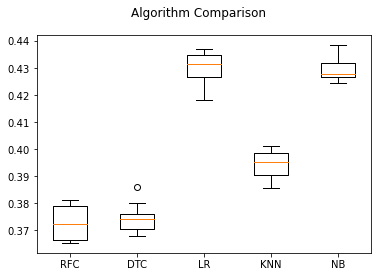

In [69]:
#Running the example provides a list of each algorithm short name, 
# the mean accuracy and the standard deviation accuracy.
# prepare models
#The higher the average, the better the estimator will perform. 
models = []
models.append(('RFC', RandomForestClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
# evaluate each model in turn
results1 = []
names1 = []
scoring1 = 'accuracy'
seed = 7
for name1, model3 in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model3, J, k, cv=kfold, scoring=scoring1)
	results1.append(cv_results)
	names1.append(name1)
	msg = "%s: %f (%f)" % (name1, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig3 = plt.figure()
fig3.suptitle('Algorithm Comparison')
ax = fig3.add_subplot(111)
plt.boxplot(results1)
ax.set_xticklabels(names1)
plt.show()

# Discritize Amount

In [70]:
data['Amount_cut']= pd.cut(data.amount,bins=[0,1000,2000,3000],include_lowest=True,
                           labels=['0-1000','1000-2000','2000-3000'])

data

,in-store,age,items,amount,region,Age_grp,Amount_cut
0,0,37,4,281.03,2,24-44,0-1000
1,0,35,2,219.51,2,24-44,0-1000
2,1,45,3,1525.70,4,44-64,1000-2000
3,1,46,3,715.25,3,44-64,0-1000
4,1,33,4,1937.50,1,24-44,1000-2000
...,...,...,...,...,...,...,...
79995,1,71,3,558.82,1,64-85,0-1000
79996,0,59,7,1932.00,3,44-64,1000-2000
79997,0,54,1,414.16,2,44-64,0-1000
79998,1,49,4,335.32,1,44-64,0-1000


In [71]:
#features
S = data.iloc[:,[0,1,2,4]]
print('Summary of feature sample')
S.head()

Summary of feature sample


,in-store,age,items,region
0,0,37,4,2
1,0,35,2,2
2,1,45,3,4
3,1,46,3,3
4,1,33,4,1


In [72]:
#dependent variable
t = data['Amount_cut']

In [73]:
#Train/Test Split
S_train, S_test, t_train, t_test = train_test_split(S, t, test_size = .25, random_state = 123)
print(S_train.shape,S_test.shape,t_train.shape,t_test.shape)

(60000, 4) (20000, 4) (60000,) (20000,)


In [74]:
print(S_train,t_train)

       in-store  age  items  region
62061         0   34      4       3
58108         0   44      7       3
41829         1   34      4       1
31387         1   28      3       4
78384         0   76      5       2
...         ...  ...    ...     ...
63206         0   81      6       2
61404         0   40      4       2
17730         1   38      2       4
28030         0   19      3       4
15725         0   30      4       4

[60000 rows x 4 columns] 62061    2000-3000
58108    1000-2000
41829       0-1000
31387       0-1000
78384       0-1000
           ...    
63206       0-1000
61404       0-1000
17730    1000-2000
28030    2000-3000
15725       0-1000
Name: Amount_cut, Length: 60000, dtype: category
Categories (3, object): ['0-1000' < '1000-2000' < '2000-3000']


In [75]:
#finding NAN in my pd.cut 
is_NaN = data.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = data[row_has_NaN]
print(rows_with_NaN)

Empty DataFrame
Columns: [in-store, age, items, amount, region, Age_grp, Amount_cut]
Index: []


In [76]:
#Modeling (Classification)
amountbin = DecisionTreeClassifier(max_depth=3)

In [77]:
modelamount = amountbin.fit(S_train,t_train)

In [78]:
#Predictionstxn
preds_amount = modelamount.predict(S_test)

In [79]:
print(classification_report(t_test, preds_amount))

              precision    recall  f1-score   support

      0-1000       0.82      0.84      0.83     13932
   1000-2000       0.42      0.56      0.48      4353
   2000-3000       0.00      0.00      0.00      1715

    accuracy                           0.71     20000
   macro avg       0.42      0.47      0.44     20000
weighted avg       0.67      0.71      0.68     20000



In [80]:
print(cross_val_score(amountbin, S, t, cv=3)) # cv = number of folds being held out

[0.70799115 0.70904114 0.70494262]


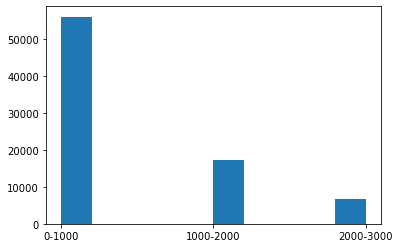

In [81]:
plt.hist(data['Amount_cut'])
plt.show()

<AxesSubplot:title={'center':'Amount spend by items'}, xlabel='Amount_cut'>

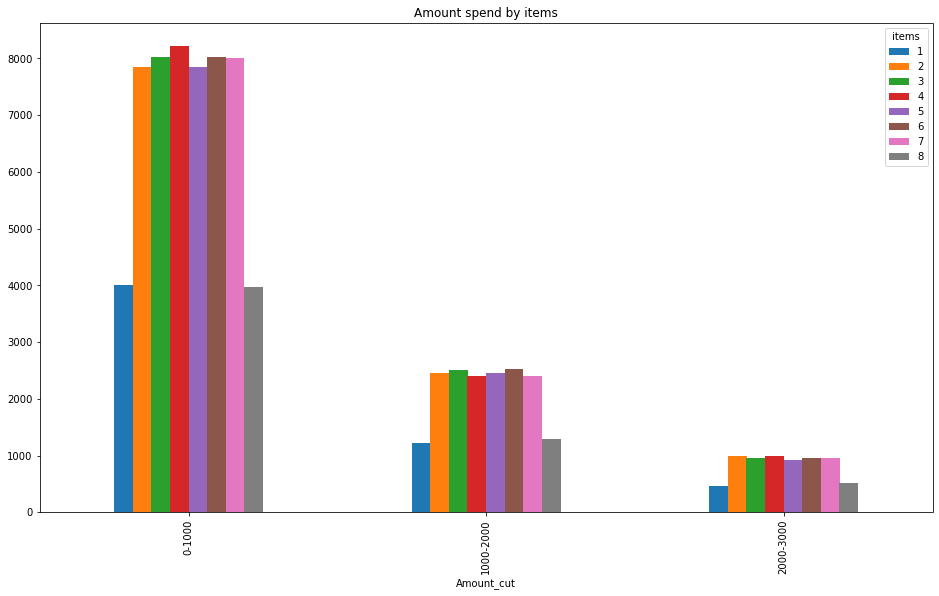

In [82]:
pivot20 = pd.pivot_table(data,index='Amount_cut',columns='items',values='amount',aggfunc='count',fill_value=0)
pivot20.plot.bar(figsize=(16, 9), title='Amount spend by items')

In [83]:
d = export_text(amountbin)
print(d)

|--- feature_3 <= 3.50
|   |--- feature_1 <= 55.50
|   |   |--- feature_3 <= 1.50
|   |   |   |--- class: 0-1000
|   |   |--- feature_3 >  1.50
|   |   |   |--- class: 0-1000
|   |--- feature_1 >  55.50
|   |   |--- feature_3 <= 2.50
|   |   |   |--- class: 0-1000
|   |   |--- feature_3 >  2.50
|   |   |   |--- class: 0-1000
|--- feature_3 >  3.50
|   |--- feature_0 <= 0.50
|   |   |--- feature_1 <= 41.50
|   |   |   |--- class: 1000-2000
|   |   |--- feature_1 >  41.50
|   |   |   |--- class: 1000-2000
|   |--- feature_0 >  0.50
|   |   |--- feature_1 <= 46.50
|   |   |   |--- class: 1000-2000
|   |   |--- feature_1 >  46.50
|   |   |   |--- class: 0-1000



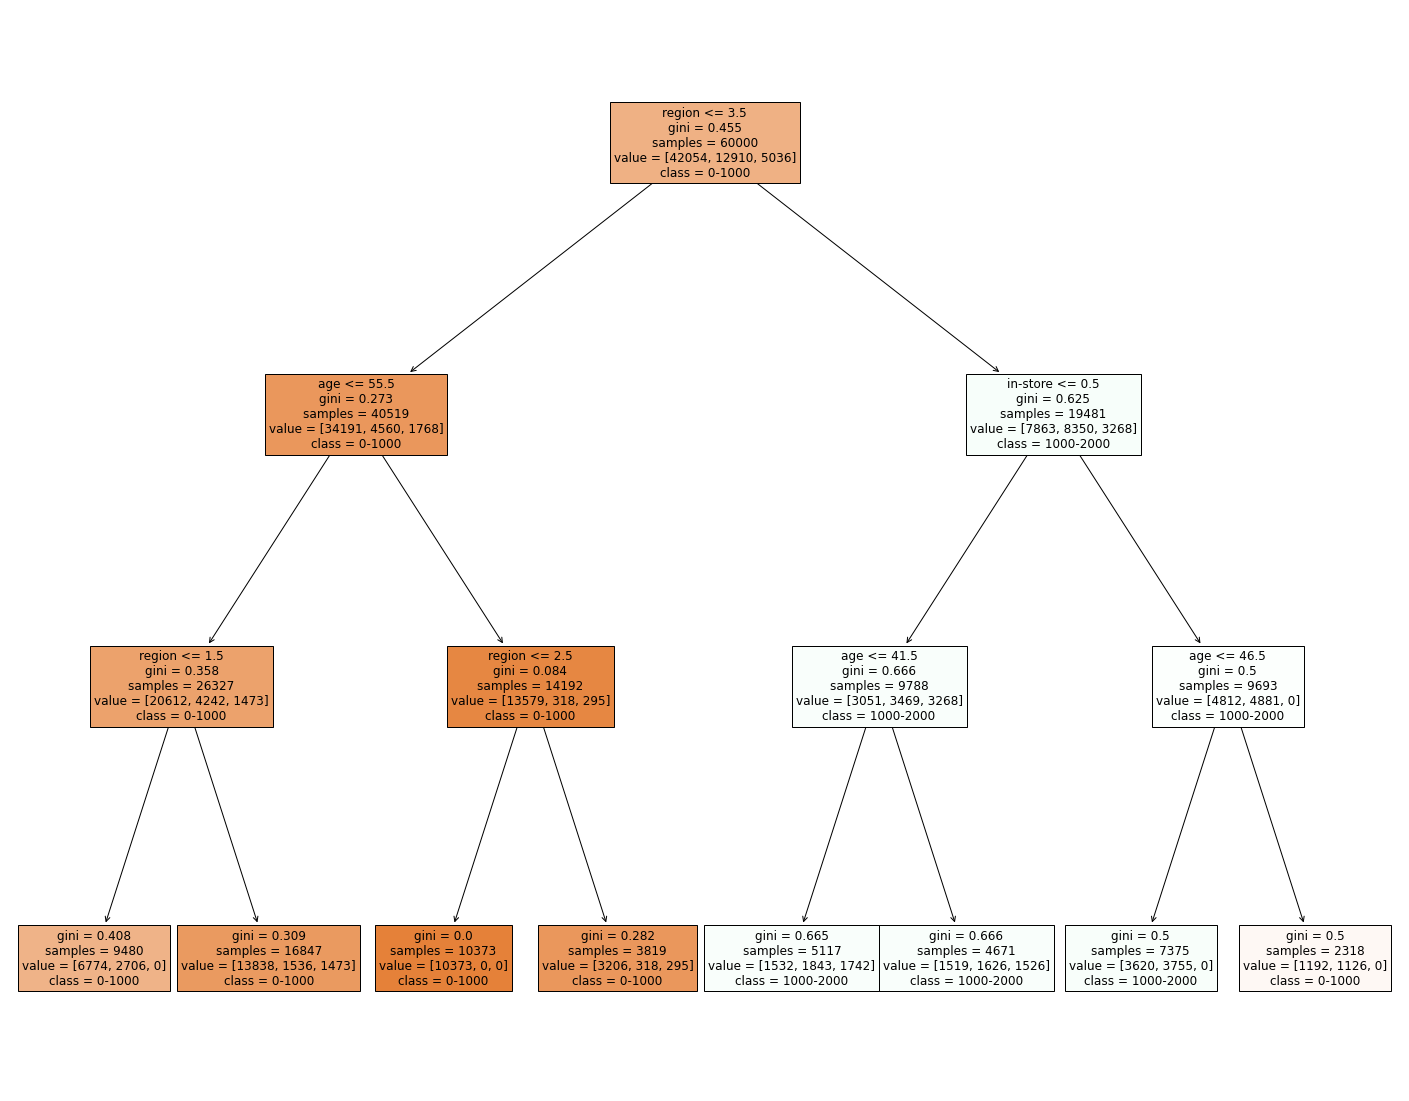

In [84]:
fig4 = plt.figure(figsize=(25,20))
tree3 = plot_tree(modelamount,max_depth=4, feature_names=S.columns,
                 class_names=['0-1000' ,'1000-2000' , '2000-3000'],
                 filled=True,fontsize=12)

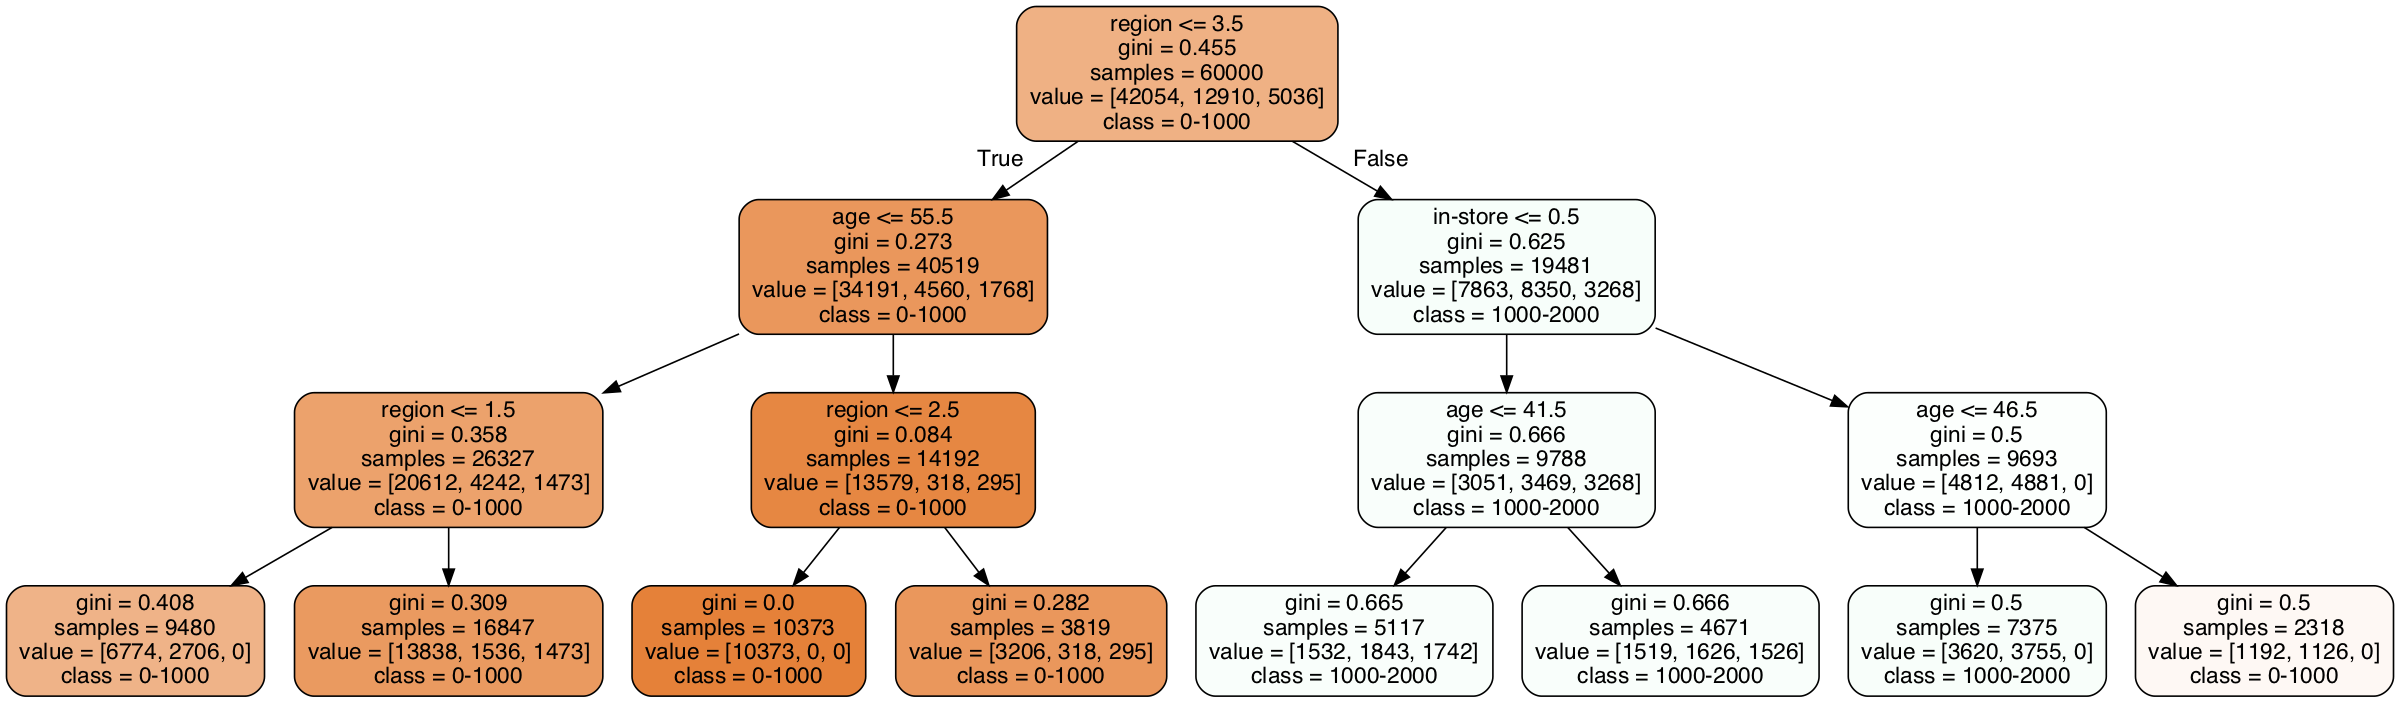

In [113]:
# Region 1 to 3 will spend 0-1000 - less than 55 yrs old 
# Region 4 will spend between 1000 - 2000 both online and instore - less than 46yrs old 


out_file3 = tree.export_graphviz(
    modelamount,
    feature_names   = S.columns,
    class_names     = ['0-1000' ,'1000-2000' , '2000-3000'],# Ascending numerical order
    filled          = True,
    rounded         = True
)
graph3 = pydotplus.graph_from_dot_data(out_file3)
graph3.set_size('"25,25!"')
Image(graph3.create_png())

In [85]:
clf_amount=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets
clf_amount.fit(S_train,t_train)
b_pred=clf_amount.predict(S_test)
print("Accuracy:",metrics.accuracy_score(t_test, b_pred)) 

Accuracy: 0.7056


RFC: 0.704937 (0.004061)
DTC: 0.704962 (0.004031)
LR: 0.703788 (0.005548)
KNN: 0.698013 (0.005159)
NB: 0.598800 (0.004813)
GB: 0.707700 (0.003824)


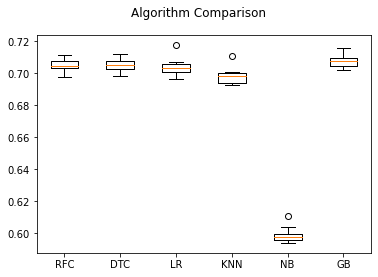

In [86]:
#Additional classification
#Running the example provides a list of each algorithm short name, 
# the mean accuracy and the standard deviation accuracy.
# prepare models
#The higher the average, the better the estimator will perform. 
models1 = []
models1.append(('RFC', RandomForestClassifier()))
models1.append(('DTC', DecisionTreeClassifier()))
models1.append(('LR', LogisticRegression()))
models1.append(('KNN', KNeighborsClassifier()))
models1.append(('NB', GaussianNB()))
models1.append(('GB', GradientBoostingClassifier()))
# evaluate each model in turn
results2 = []
names2 = []
scoring2 = 'accuracy'
seed2 = 7
for name2, model4 in models1:
	kfold1 = model_selection.KFold(n_splits=10, random_state=seed2)
	cv_results1 = model_selection.cross_val_score(model4, S, t, cv=kfold1, scoring=scoring2)
	results2.append(cv_results1)
	names2.append(name2)
	msg1 = "%s: %f (%f)" % (name2, cv_results1.mean(), cv_results1.std())
	print(msg1)
# boxplot algorithm comparison
fig5 = plt.figure()
fig5.suptitle('Algorithm Comparison')
ax1 = fig5.add_subplot(111)
plt.boxplot(results2)
ax1.set_xticklabels(names2)
plt.show()

# What about items? Are these even in the tree? Why or why not?

In [87]:
#Correlation 
# items have negative to 0 correlation with other demographics meaning there is only week correlation
#nand is homogenous
# So is the reason we dont see them in top of any of our decision tree 
# They do appear in the Amount discritizing in the 3rd depth inferring anyone above 41 age 
# will buy items more than 5 and spend between 1000-2000
#items did appear in age discritizing
def correlation_heatmap(data):
    correlations = data.corr()
    print(correlations)
corr_mat = data.corr()
print(corr_mat)   

          in-store       age     items    amount    region
in-store  1.000000 -0.178256 -0.003954 -0.085474 -0.133114
age      -0.178256  1.000000  0.000679 -0.282089 -0.235446
items    -0.003954  0.000679  1.000000  0.000367 -0.001925
amount   -0.085474 -0.282089  0.000367  1.000000  0.403504
region   -0.133114 -0.235446 -0.001925  0.403504  1.000000


# What about classifying Where a transaction took place -can that be done successfully?

In [88]:
#features
Q = data.iloc[:,[1,2,3,4]]
print('Summary of feature sample')
Q.head()

Summary of feature sample


,age,items,amount,region
0,37,4,281.03,2
1,35,2,219.51,2
2,45,3,1525.70,4
3,46,3,715.25,3
4,33,4,1937.50,1


In [89]:
R = data['in-store']

In [90]:
R

0        0
1        0
2        1
3        1
4        1
        ..
79995    1
79996    0
79997    0
79998    1
79999    1
Name: in-store, Length: 80000, dtype: int64

In [91]:
#Train/Test Split
Q_train, Q_test, r_train, r_test = train_test_split(Q, R, test_size = .25, random_state = 123)
print(Q_train.shape,Q_test.shape,r_train.shape,r_test.shape)

(60000, 4) (20000, 4) (60000,) (20000,)


In [92]:
print(Q_train,r_train)

       age  items    amount  region
62061   34      4  2620.100       3
58108   44      7  1811.100       3
41829   34      4    78.808       1
31387   28      3   689.570       4
78384   76      5    60.231       2
...    ...    ...       ...     ...
63206   81      6    25.055       2
61404   40      4   232.070       2
17730   38      2  1608.000       4
28030   19      3  2072.700       4
15725   30      4   833.700       4

[60000 rows x 4 columns] 62061    0
58108    0
41829    1
31387    1
78384    0
        ..
63206    0
61404    0
17730    1
28030    0
15725    0
Name: in-store, Length: 60000, dtype: int64


In [93]:
#Modeling (Classification)
modelinstore = DecisionTreeClassifier(max_depth=4)

In [94]:
txn = modelinstore.fit(Q_train,r_train)

In [95]:
#Predictions
preds_txn = txn.predict(Q_test)

In [96]:
print(classification_report(r_test, preds_txn))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      9831
           1       0.85      0.83      0.84     10169

    accuracy                           0.84     20000
   macro avg       0.84      0.84      0.84     20000
weighted avg       0.84      0.84      0.84     20000



In [97]:
print(cross_val_score(modelinstore, Q, R, cv=2)) # cv = number of folds being held out

[0.839475 0.840375]


In [98]:
l = export_text(modelinstore)
print(l)

|--- feature_3 <= 1.50
|   |--- class: 1
|--- feature_3 >  1.50
|   |--- feature_3 <= 2.50
|   |   |--- class: 0
|   |--- feature_3 >  2.50
|   |   |--- feature_2 <= 1999.45
|   |   |   |--- feature_2 <= 999.78
|   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  999.78
|   |   |   |   |--- class: 0
|   |   |--- feature_2 >  1999.45
|   |   |   |--- feature_2 <= 2000.10
|   |   |   |   |--- class: 0
|   |   |   |--- feature_2 >  2000.10
|   |   |   |   |--- class: 0



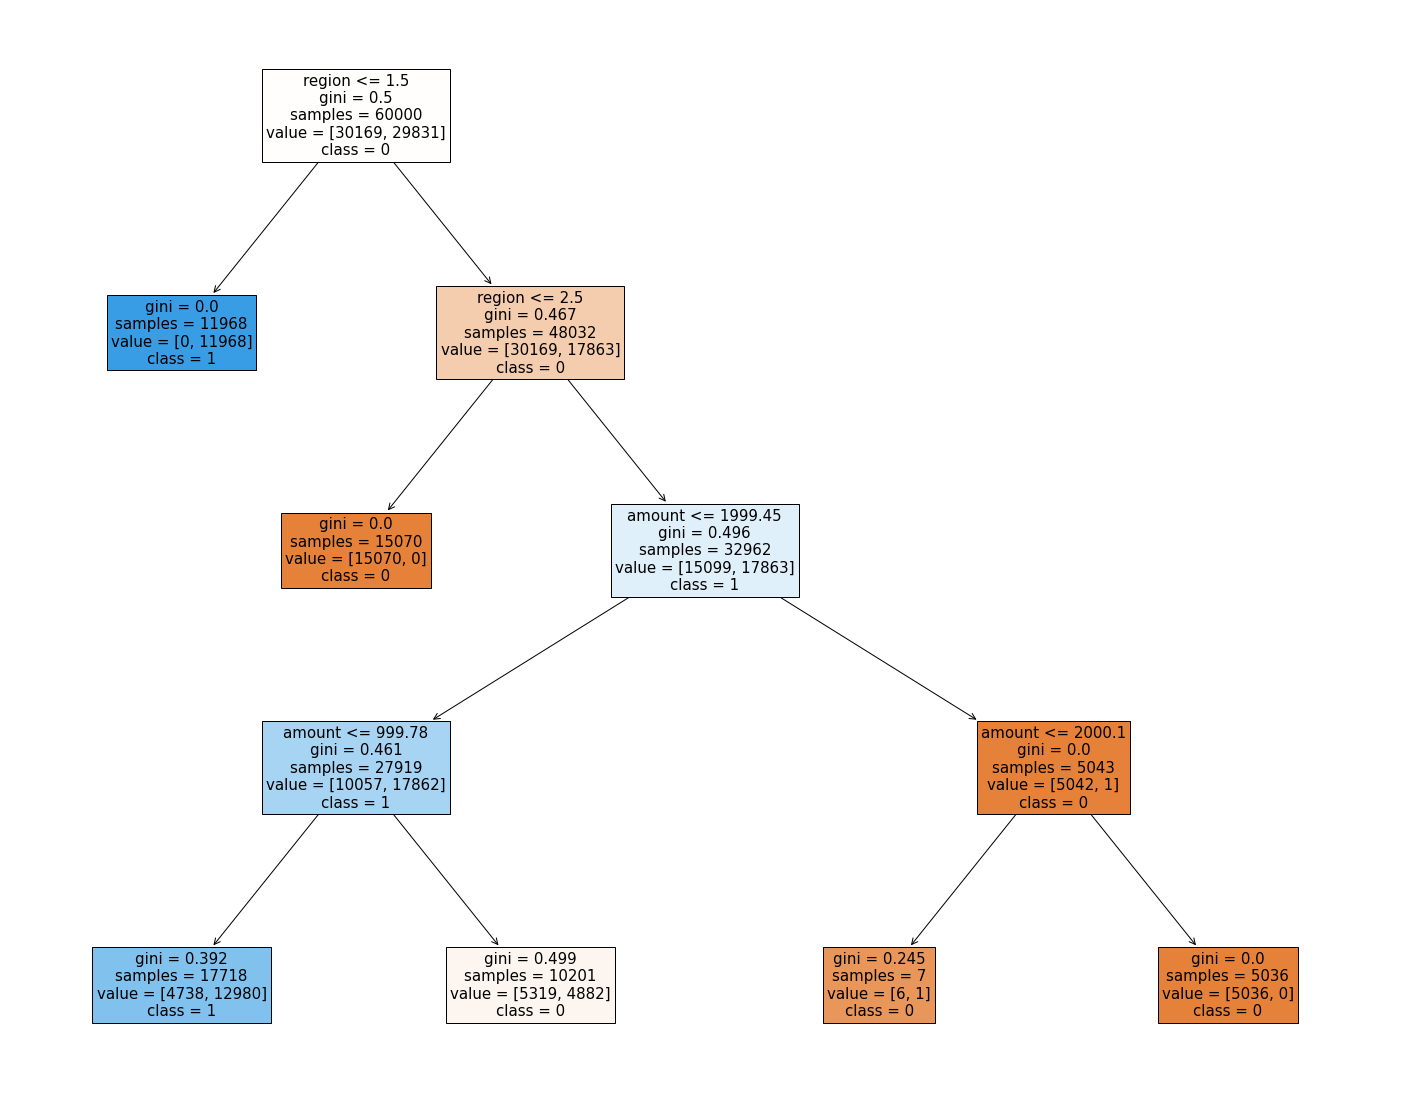

In [99]:

fig6 = plt.figure(figsize=(25,20))
tree4 = plot_tree(txn,max_depth=4, feature_names=Q.columns,
                 class_names=['0' ,'1' ],
                 filled=True,fontsize=15)

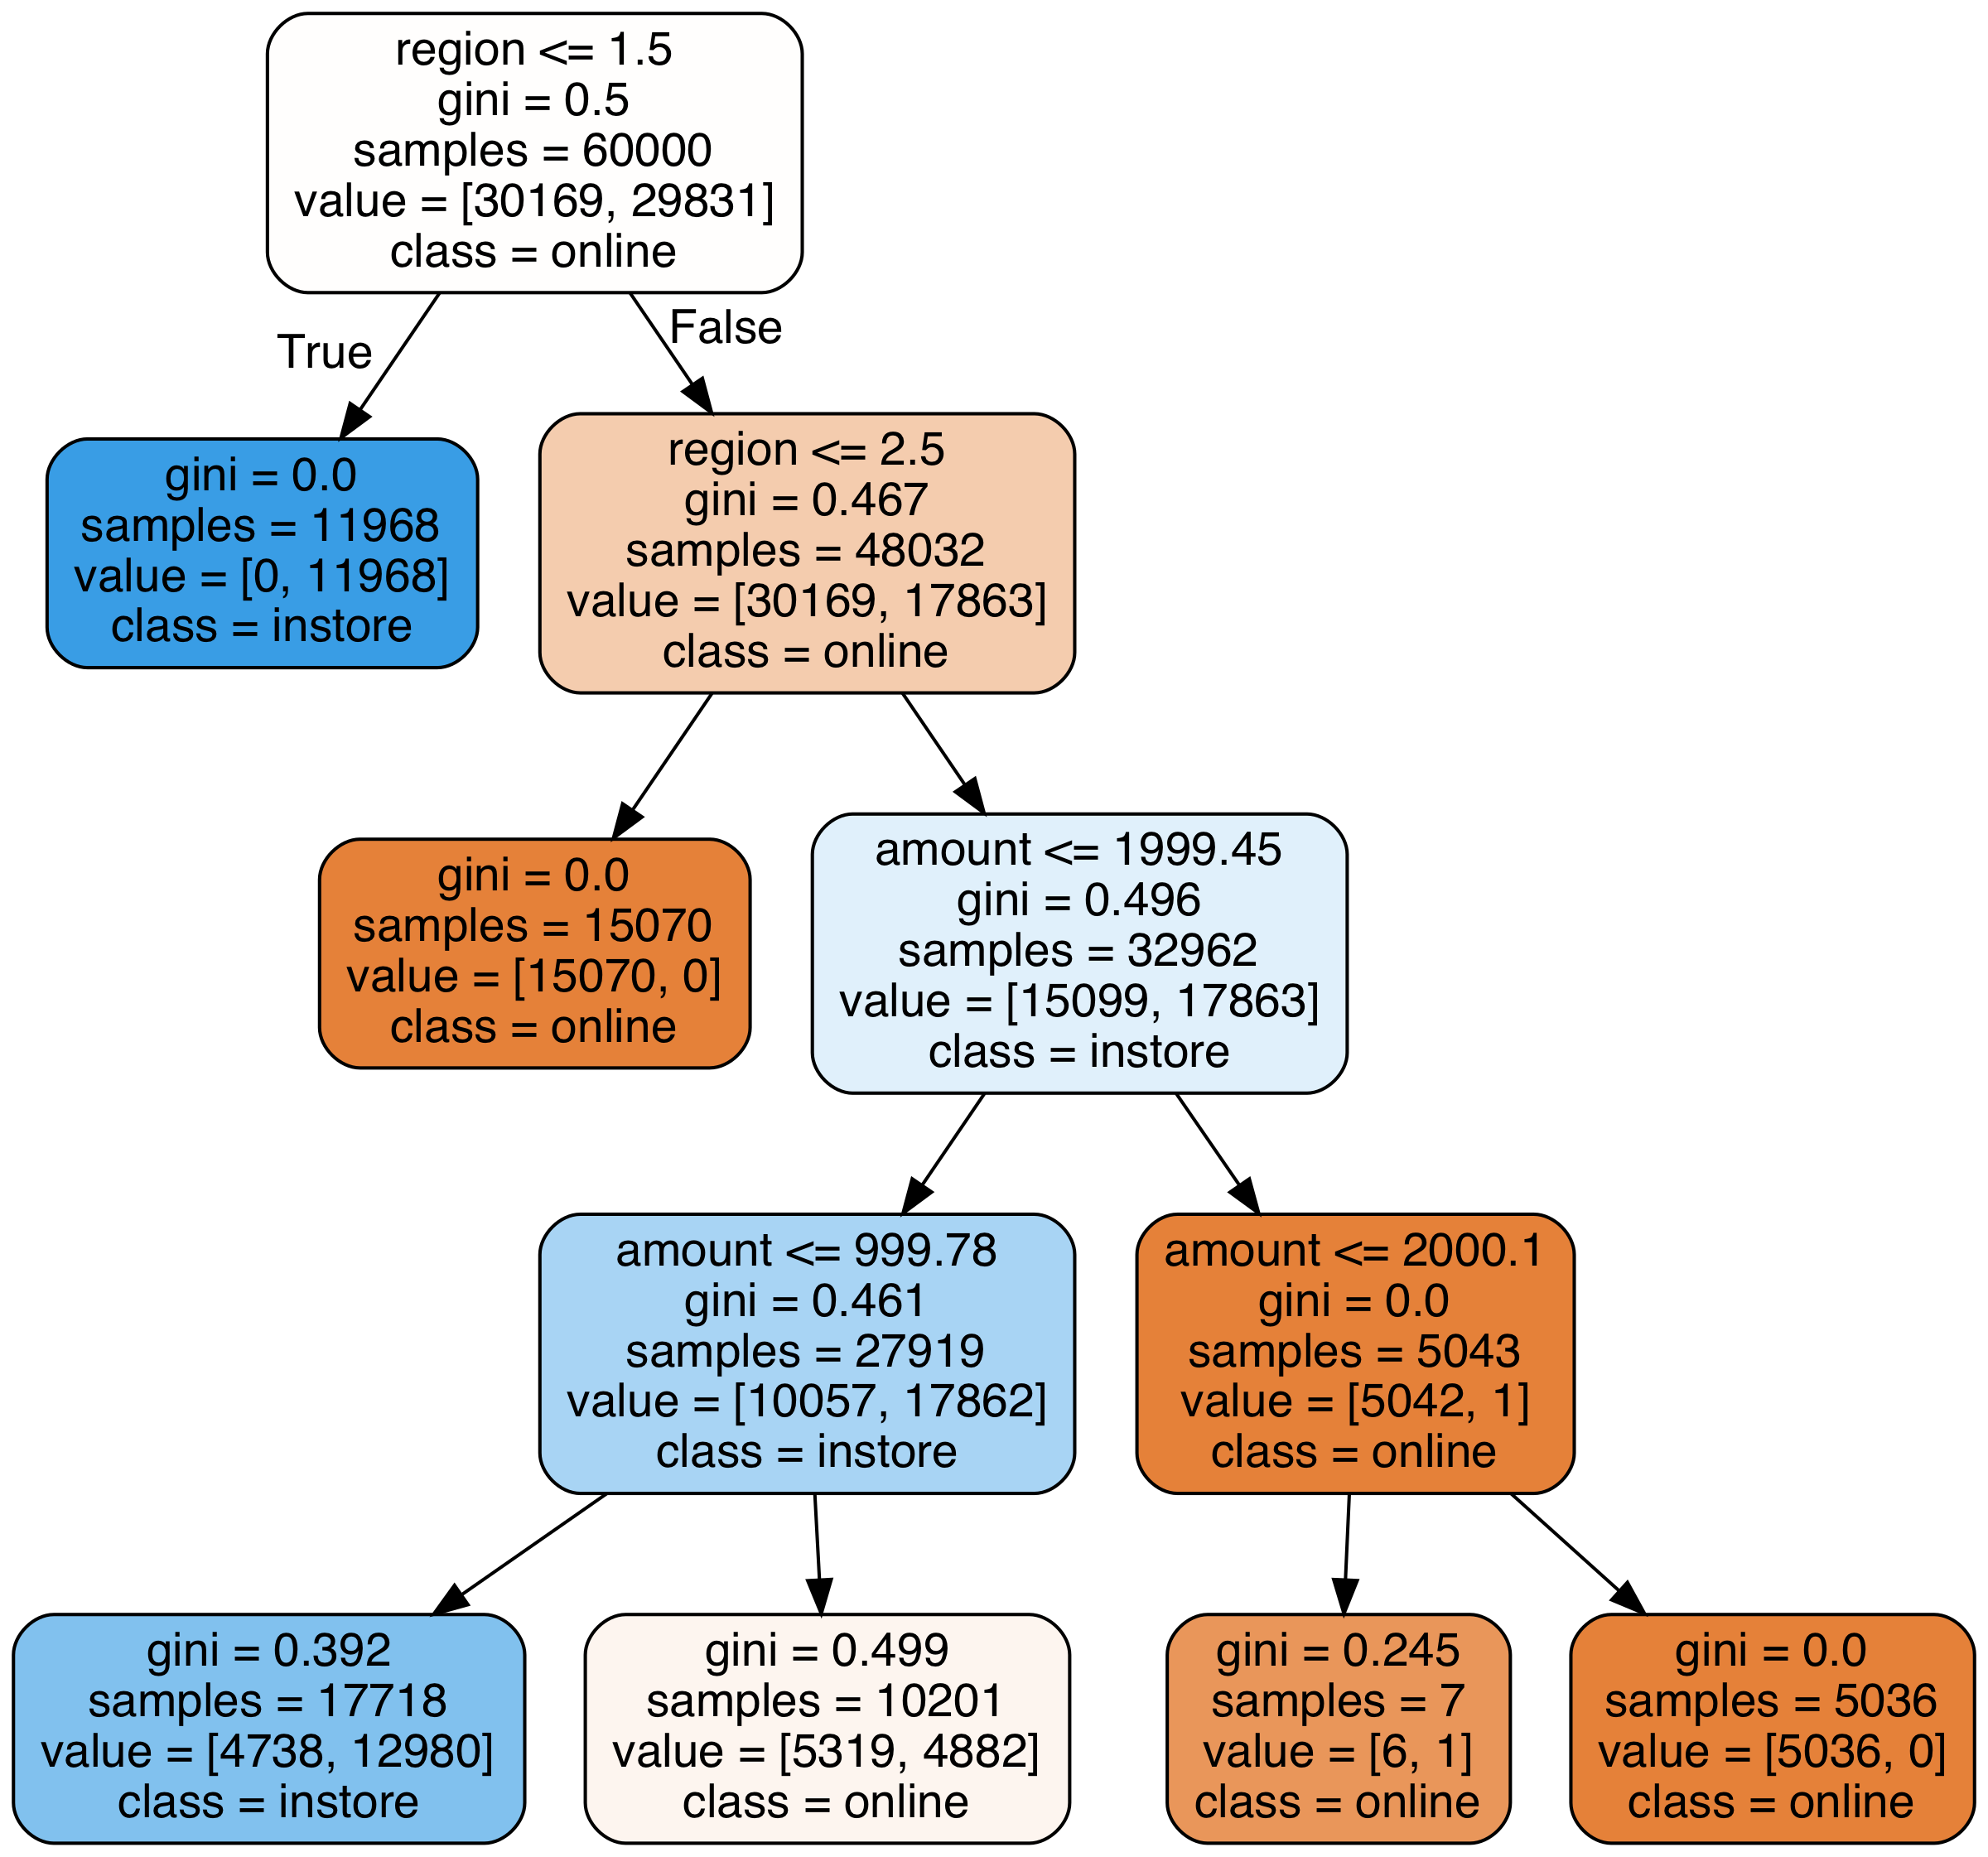

In [114]:
# Region 1 spend will be from instore 
# Region 2 spend will be from online 
# Instore will be bring in less than $2000 spend 
# Greater than $2000 spend will be from online 

out_file4 = tree.export_graphviz(
    txn,
    feature_names   = Q.columns,
    class_names     = ['online' ,'instore' ],# Ascending numerical order
    filled          = True,
    rounded         = True
)
graph4 = pydotplus.graph_from_dot_data(out_file4)
graph4.set_size('"25,25!"')
Image(graph4.create_png())

# Items 

In [127]:
#Items 

U = data.iloc[:,[0,1,3,4]]
print('Summary of feature sample')
U.head()


Summary of feature sample


,in-store,age,amount,region
0,0,37,281.03,2
1,0,35,219.51,2
2,1,45,1525.70,4
3,1,46,715.25,3
4,1,33,1937.50,1


In [128]:
V = data['items']

In [129]:
#Train/Test Split
U_train, U_test, v_train, v_test = train_test_split(U, V, test_size = .25, random_state = 123)
print(U_train.shape,U_test.shape,v_train.shape,v_test.shape)

(60000, 4) (20000, 4) (60000,) (20000,)


In [130]:
#Modeling (Classification)
dtcitem = DecisionTreeClassifier(max_depth=3)

In [131]:
dtcitemfit = dtcitem.fit(U_train,v_train)

In [132]:
#Predictions
preds_item = dtcitemfit.predict(U_test)

In [133]:
print(classification_report(v_test, preds_item))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1435
           2       0.00      0.00      0.00      2880
           3       0.15      0.00      0.01      2858
           4       0.00      0.00      0.00      2947
           5       0.00      0.00      0.00      2808
           6       0.14      1.00      0.25      2790
           7       0.00      0.00      0.00      2819
           8       0.00      0.00      0.00      1463

    accuracy                           0.14     20000
   macro avg       0.04      0.13      0.03     20000
weighted avg       0.04      0.14      0.04     20000



In [134]:
print(cross_val_score(dtcitem, U, V, cv=3)) # cv = number of folds being held out

[0.14313571 0.14504819 0.14366609]


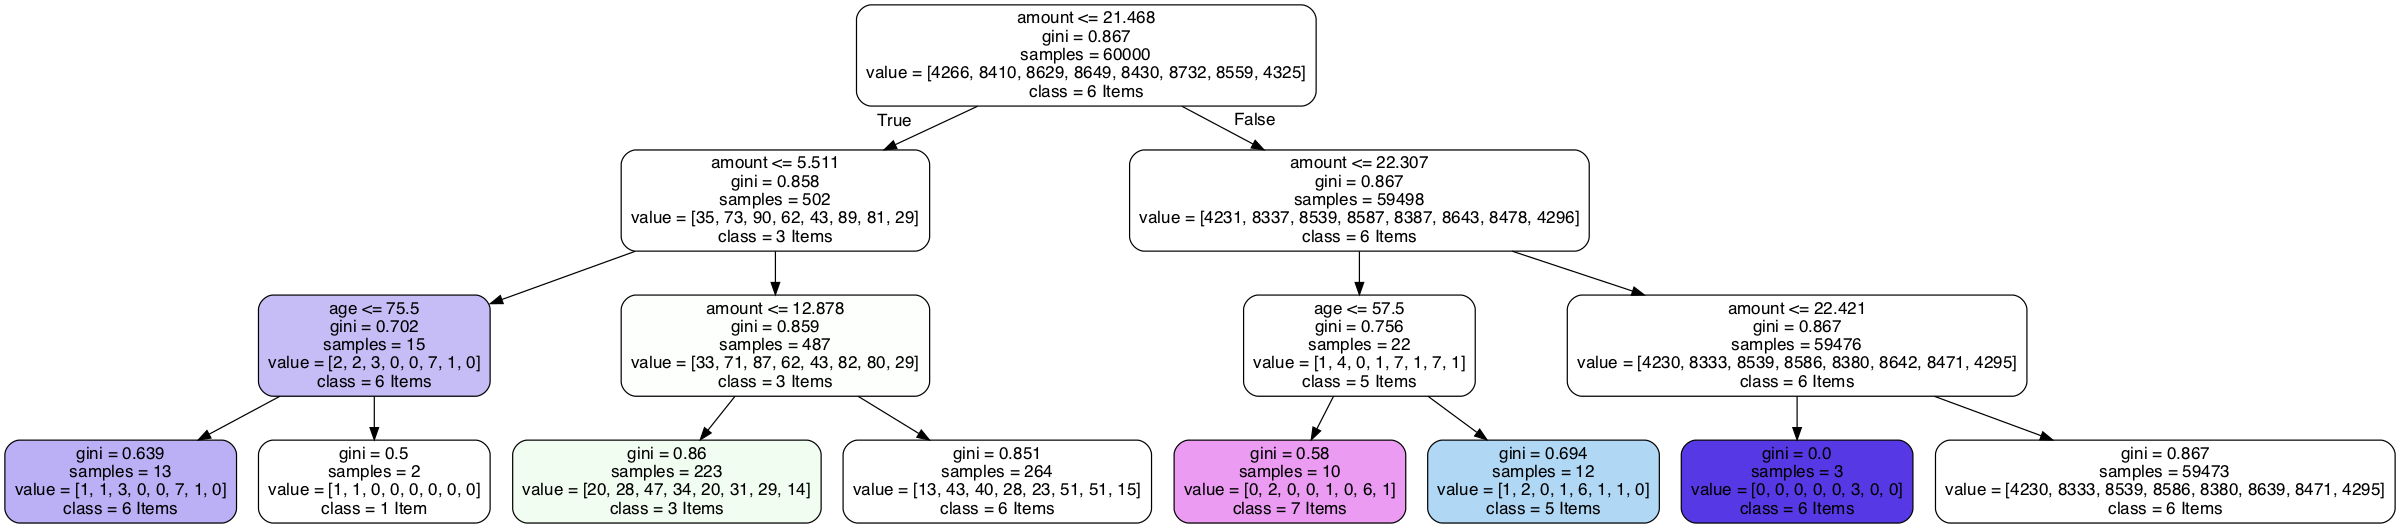

In [135]:
out_file5 = tree.export_graphviz(
    dtcitem,
    feature_names   = U.columns,
    class_names     = ['1 Item', '2 Items','3 Items','4 Items', '5 Items', '6 Items', '7 Items', '8 Items'],# Ascending numerical order
    filled          = True,
    rounded         = True
)
graph5 = pydotplus.graph_from_dot_data(out_file5)
graph5.set_size('"25,25!"')
Image(graph5.create_png())